### Lab Assignment 2: Data Preprocessing Pipeline

##### Aim: To implement a data preprocessing pipeline, including data cleaning, feature engineering, and basic classification, using the Heart Disease UCI dataset.

#### Task 1: Load and Explore the Dataset

#### 1. Load the Heart Disease UCI dataset using pandas.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#### 2. Display dataset characteristics:

##### − Number of records and features

In [3]:
df.shape

(920, 16)

##### − Data types of columns

In [4]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

##### − Summary statistics (mean, median, standard deviation, etc.).

In [5]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
df.median(numeric_only = True)

id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

#### 3. Identify missing values and check for duplicate records.

In [7]:
df.isnull()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False
916,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False
917,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
918,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [8]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [9]:
df.duplicated().sum()

0

#### Task 2: Data Cleaning

#### 1. Handle missing values using:

##### Mean/median/mode imputation for numerical columns.

In [10]:
numeric = df.select_dtypes(include =['float64','int64']).columns
df[numeric] = df[numeric].fillna(df[numeric].median())

##### Most frequent category imputation for categorical columns.

In [11]:
categoric = df.select_dtypes(include=['object']).columns
df[categoric] = df[categoric].fillna(df[categoric].mode())

In [12]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64

#### 3. Detect and handle outliers using:

##### − Box plots

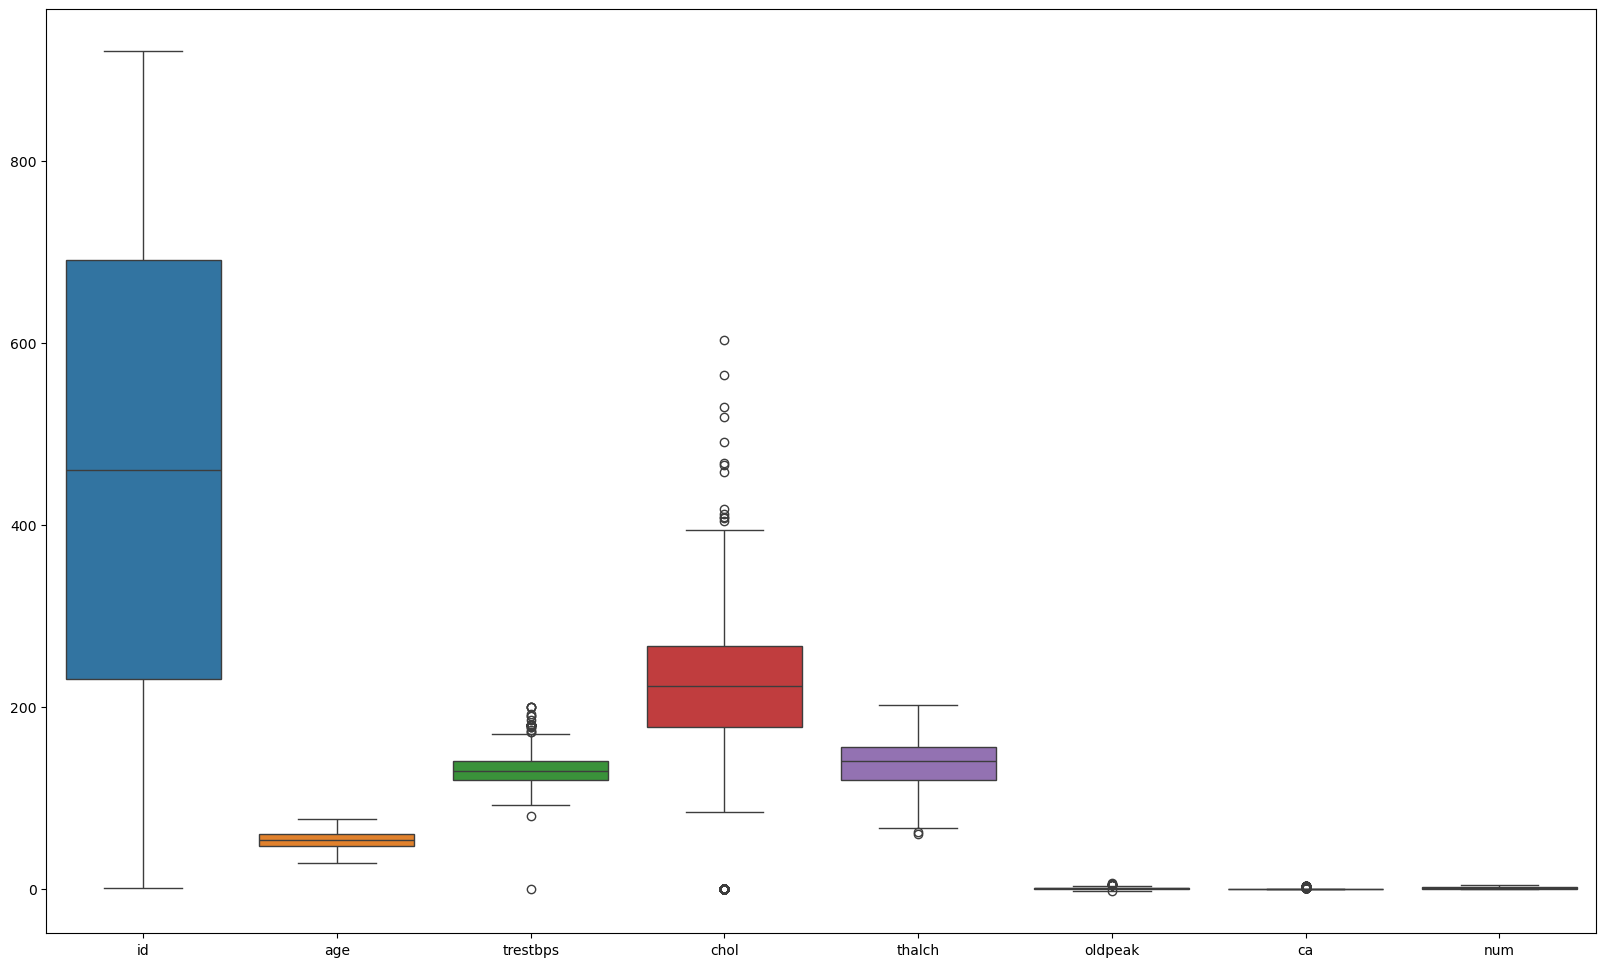

In [13]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize = (20,12))
sns.boxplot(data=df[num_columns])
plt.show()

##### − Z-score method

In [14]:
from scipy.stats import zscore
z_scores = df[numeric].apply(zscore)

zero_outliers = df[(z_scores < 3).all(axis=1)]
df = zero_outliers

df_shape = df.shape

In [15]:
print('Data after removing outliers:',df_shape)

Data after removing outliers: (887, 16)


### Task 3: Feature Engineering

#### 1. Convert categorical features into numerical format using:

##### − One-hot encoding

In [16]:
df = pd.get_dummies(df, columns=categoric, drop_first=True)

In [17]:
df.head()

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,1,63,145.0,233.0,150.0,2.3,0.0,0,True,False,...,False,True,True,False,False,False,False,False,False,False
2,3,67,120.0,229.0,129.0,2.6,2.0,1,True,False,...,False,False,False,False,False,True,True,False,False,True
3,4,37,130.0,250.0,187.0,3.5,0.0,0,True,False,...,True,False,False,True,False,False,False,False,True,False
4,5,41,130.0,204.0,172.0,1.4,0.0,0,False,False,...,False,False,False,False,False,False,False,True,True,False
5,6,56,120.0,236.0,178.0,0.8,0.0,0,True,False,...,False,False,False,True,False,False,False,True,True,False


##### − Label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
categoric = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()
for col in categoric:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
    else:
        print(f"Column '{col}' not found in the dataset.")


#### 2. Normalize numerical features using:

##### − Min-Max Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric] = scaler.fit_transform(df[numeric])

##### − Standardization

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric] = scaler.fit_transform(df[numeric])

#### 3. Analyse feature importance using correlation analysis.

In [21]:
corr= df.corr()
corr

,id,age,trestbps,chol,thalch,oldpeak,ca,num,sex_Male,dataset_Hungary,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
id,1.000000,0.269867,0.052029,-0.367751,-0.446318,0.055014,-0.363204,0.318765,0.287763,-0.047275,...,-0.096052,-0.068768,0.160651,-0.042409,0.391885,0.169577,-0.039195,-0.333088,-0.481388,-0.169329
age,0.269867,1.000000,0.232077,-0.098067,-0.361037,0.231706,0.208402,0.332769,0.069513,-0.400148,...,-0.011819,0.033895,0.227493,-0.215523,0.147810,0.162084,0.111591,-0.010953,-0.031038,0.124124
trestbps,0.052029,0.232077,1.000000,0.102173,-0.102014,0.144652,0.002857,0.078398,0.008305,0.032937,...,-0.030240,0.042978,0.148356,-0.096619,0.090487,0.150267,0.064928,-0.051488,-0.041228,0.070475
chol,-0.367751,-0.098067,0.102173,1.000000,0.231315,0.026499,0.127913,-0.264661,-0.203249,0.322291,...,0.000786,0.018260,0.076576,-0.024756,-0.127878,-0.038586,-0.039741,-0.004160,0.125905,-0.109566
thalch,-0.446318,-0.361037,-0.102014,0.231315,1.000000,-0.157453,0.063583,-0.359543,-0.179379,0.036979,...,0.142558,0.100555,-0.028136,0.015796,-0.135210,-0.364215,-0.240757,0.304255,0.295141,-0.104733
oldpeak,0.055014,0.231706,0.144652,0.026499,-0.157453,1.000000,0.173369,0.406139,0.116991,-0.168533,...,-0.110003,0.028843,0.038580,-0.080490,0.028249,0.422426,0.402720,-0.098867,-0.112379,0.124522
ca,-0.363204,0.208402,0.002857,0.127913,0.063583,0.173369,1.000000,0.204365,-0.047612,-0.239184,...,-0.036527,0.060215,0.037424,-0.114772,-0.153849,0.053196,0.133087,0.156733,0.150625,0.238635
num,0.318765,0.332769,0.078398,-0.264661,-0.359543,0.406139,0.204365,1.000000,0.288093,-0.375735,...,-0.152485,-0.046499,0.127674,-0.151280,0.143632,0.357586,0.245719,-0.140298,-0.232888,0.268577
sex_Male,0.287763,0.069513,0.008305,-0.203249,-0.179379,0.116991,-0.047612,0.288093,1.000000,-0.119723,...,-0.069607,-0.006461,0.081332,-0.019056,0.063101,0.155638,0.028297,-0.102855,-0.300040,0.145117
dataset_Hungary,-0.047275,-0.400148,0.032937,0.322291,0.036979,-0.168533,-0.239184,-0.375735,-0.119723,1.000000,...,-0.057715,-0.039617,-0.158002,0.276094,-0.037100,-0.094440,-0.090696,-0.300994,-0.318365,-0.277215


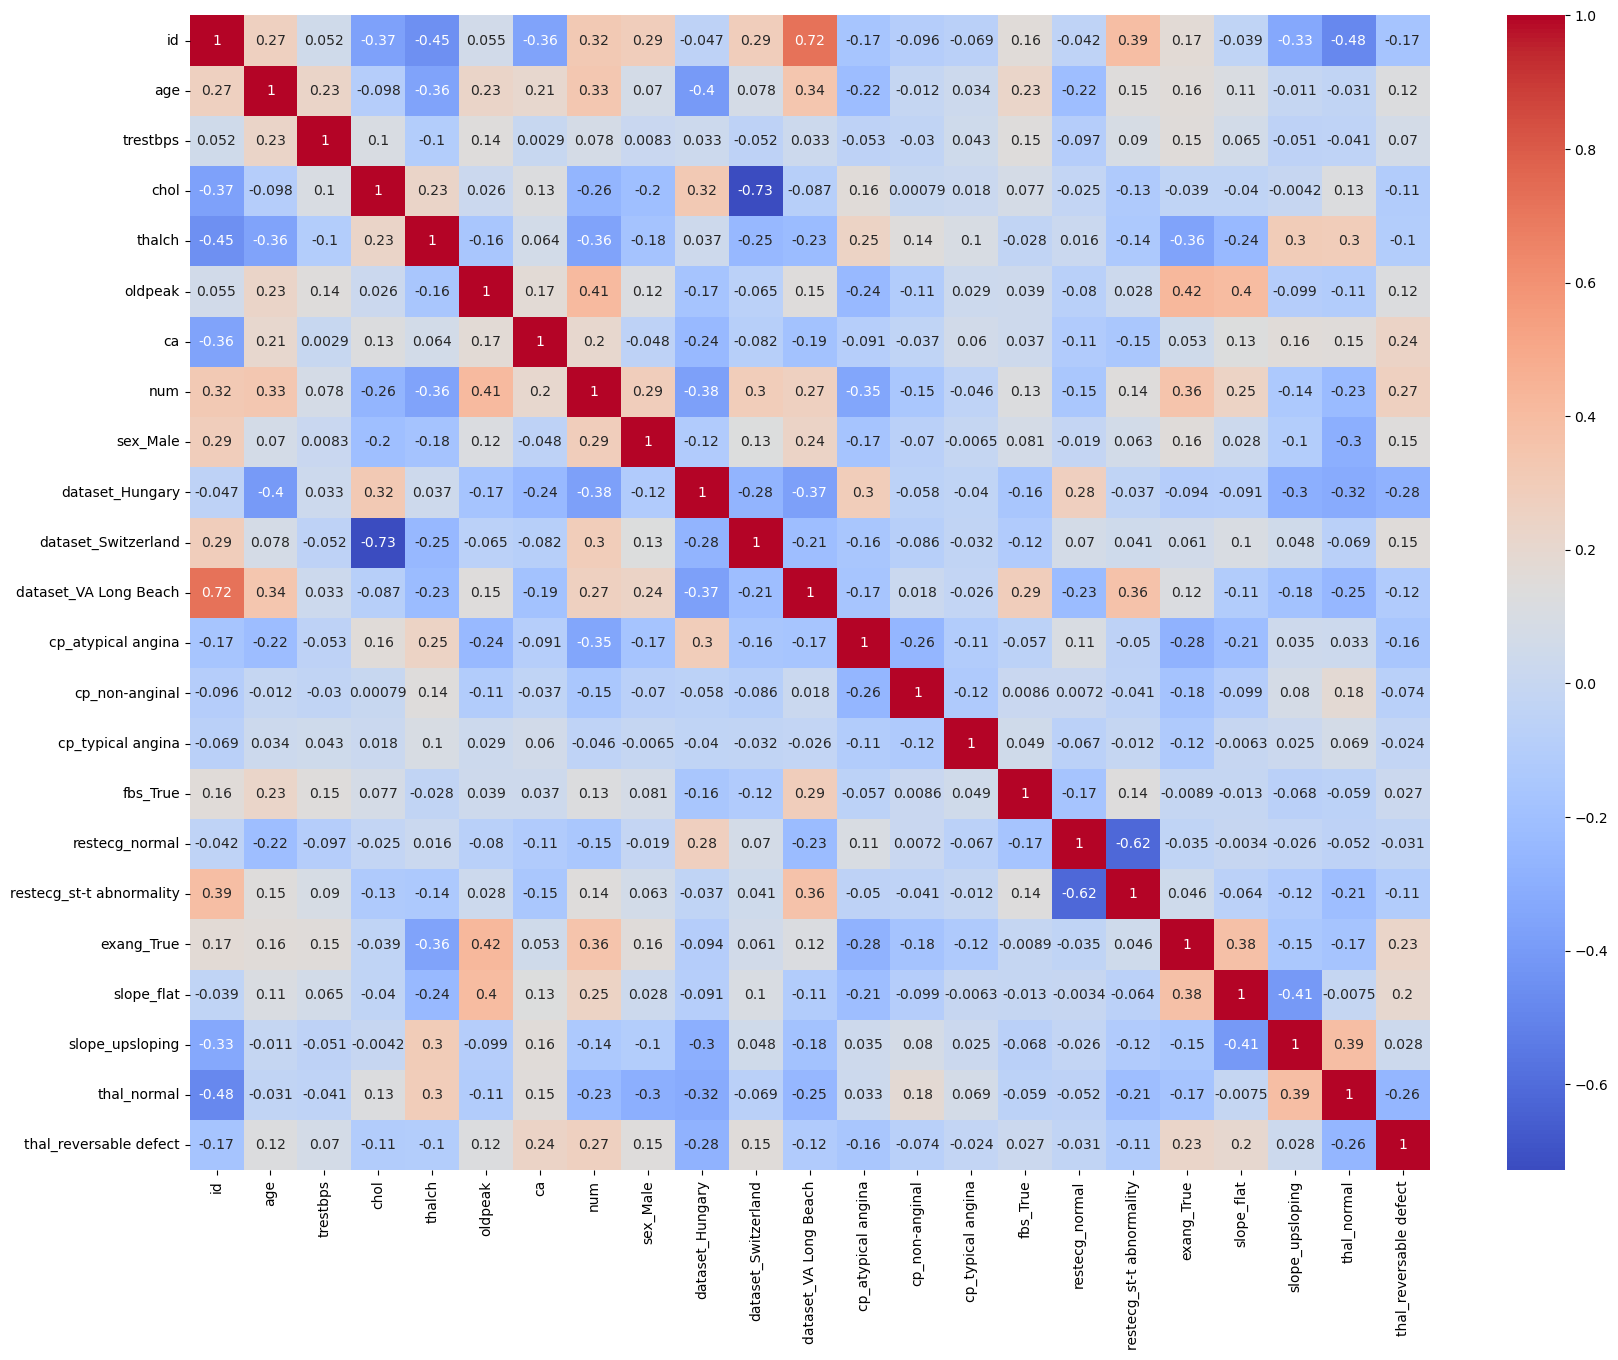

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

### Task 4: Basic Classification using k-Nearest Neighbors (kNN)

#### 1. Split the dataset into training (80%) and testing (20%) sets.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop('num',axis=1)
y = df['num']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [27]:
print("Unique values in y_train:", y_train.unique())

Unique values in y_train: [1 0 2]


#### 2. Train a k-Nearest Neighbors (kNN) classifier using Scikit-learn.

In [28]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

#### 3. Evaluate the model’s performance using:

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8595505617977528


In [30]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       155
           1       0.33      0.10      0.15        20
           2       0.00      0.00      0.00         3

    accuracy                           0.86       178
   macro avg       0.40      0.36      0.36       178
weighted avg       0.80      0.86      0.82       178



In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[151   4   0]
 [ 18   2   0]
 [  3   0   0]]
